In [2]:
import sys
import os
import numpy as np
import pandas as pd
import sklearn.metrics
from matplotlib import pyplot as plt
from scipy.ndimage import measurements

In [3]:
x_NF = np.loadtxt('x_train.csv',
        skiprows=1, delimiter=',')
y_N = np.loadtxt('y_train.csv',
        skiprows=1, delimiter=',')
print(x_NF.shape)

(12000, 784)


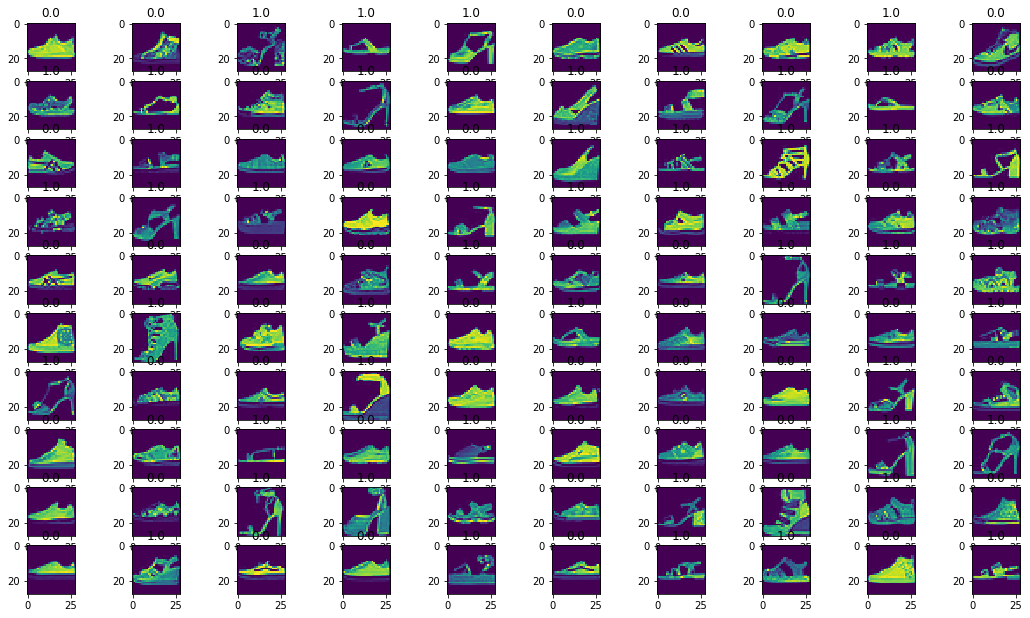

In [4]:
f, axlist = plt.subplots(10, 10, sharex=False)
f.set_size_inches(18.5, 10.5, forward=True)
for i in range(100, 110):
    for j in range(5, 15):
        axlist[i-100][j-5].imshow(x_NF[i*j].reshape(28,28), vmin=0.0, vmax=1.0)
        axlist[i-100][j-5].set_title(str(y_N[i*j]))
        


In [9]:
'''
Notes:
holes in the center
if there are a lot of large chunks of black in the center, classify as sandal
Look for skinny lines of color 
Having a diagaonal line near top of the shoe
Presence of curve of top of shoe it fully colored
Continuous color?
Find length of largest region
'''


'\nNotes:\nholes in the center\nif there are a lot of large chunks of black in the center, classify as sandal\nLook for skinny lines of color \nHaving a diagaonal line near top of the shoe\n'

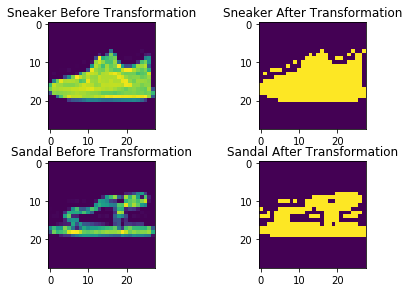

In [18]:
f, ax = plt.subplots(2, 2, sharex=False)
f.tight_layout()
ax[0][0].imshow(x_NF[500].reshape(28,28), vmin=0.0, vmax=1.0)
  
ax[0][0].set_title('Sneaker Before Transformation')
ax[0][1].set_title('Sneaker After Transformation')
ax[0][1].imshow(np.ceil(x_NF[500]).reshape(28,28), vmin=0.0, vmax=1.0)
sand_N = np.argwhere(y_N==1)
ax[1][0].imshow(x_NF[sand_N[42]].reshape(28,28), vmin=0.0, vmax=1.0)
  
ax[1][0].set_title('Sandal Before Transformation')
ax[1][1].set_title('Sandal After Transformation')
ax[1][1].imshow(np.ceil(x_NF[sand_N[42]]).reshape(28,28), vmin=0.0, vmax=1.0)

In [109]:
def getClusterNum(x_F):
        e = measurements.label(x_F[np.newaxis].reshape(28, 28))[0]
        return e.reshape(784)
x_NF.reshape(12000, 784)
print(x_NF.shape)
d =np.apply_along_axis(getClusterNum, 1, x_NF)
x_NF.reshape(12000, 784)
print(x_NF.shape)

(12000, 784)
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  0  0  2  2
  0  0  0  0  3  0  3  3  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0
  0  0  0  0  0  3  3  3  3  3  3  0  0  0  0  0  0  0  0  0  0  4  0  0  0
  0  0  0  3  3  3  3  3  3  3  3  3  0  0  0  0  0  0  0  0  0  0  0  0  4
  0  0  0  0  3  3  3  3  3  3  3  3  3  3  3  3  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  3  3  3  3  3  3  3  0  3  0  3  3  3  3  0  0  0  0  0  0
  0  0  0  0  0  5  5  0  3  3  3  3  3  3  0  0  0  0  3  3  3  3  3  0  0
  0  0  0  0  0  0  0  0  5  0  0  3  3  3  3  0  0  0  0  0  0  3  3  3  3
  3  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  6  6  0  0  7  0  3
  3  3  3  3  3  0  0  0  0  0  0  0  0  0  0  0  0  0  6  6  6  6  6  0  0
  7  0  3  3  3  3  3  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [111]:
s = 5* np.ceil(x_NF)
s[30]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [108]:
ah= np.vectorize(measurements.label)
d = np.ceil(x_NF[500].reshape(784))
lw, num = measurements.label(d)
print(d.shape)
print(num)
print(lw.shape)
c = np.ceil(x_NF[50].reshape(784)).reshape(28, 28)
a, b = measurements.label(c)
print(b)
print(b==num)
print(x_NF.shape)
a

(784,)
25
(784,)
17
False
(12000, 784)


array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  1,  1,  1,  1,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  1,  1,
         1,  1,  1,  

In [86]:
from scipy.sparse.csgraph import connected_components
from scipy.sparse import csr_matrix
print(x_NF.shape)
a = x_NF.reshape(x_NF.shape[0], 28, 28)
w, p =np.apply_over_axes(measurements.label, a, [0,2])
print(x_NF.shape)
print(w.shape)
print(p.shape)
x_NF.reshape(12000, 784)
print(x_NF.shape)


(12000, 784)


RuntimeError: structure and input must have equal rank

In [68]:
print(x_NF[500].shape)
c, d = measurements.label(np.ceil(x_NF[500].reshape(1, 784)))
print(c)
print(d)

(784,)
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0
   0  0  0  0  2  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  4  0  5
   5  5  0  0  0  0  0  6  0  7  7  0  0  0  0  0  0  0  0  0  0  0  0  0
   8  8  8  8  8  8  0  0  9  9  0  0  0 10 10  0  0  0  0  0  0  0  0  0
   0 11  0 12 12 12 12 12 12 12 12  0  0  0  0 13 13 13 13  0  0  0  0  0
   0  0  0 14  0  0  0 15 15 15

(12000, 28, 28)
(12000, 28, 28)
(12000, 784)


AttributeError: 'NoneType' object has no attribute 'ceil'

In [49]:

x_NF.resize(x_NF.shape[0], 784)
s = np.count_nonzero(x_NF, axis = 1)
print(s.shape)
print(s)

(12000,)
[248 253 314 ..., 322 240 204]


In [96]:
print(x_NF.shape)
f = x_NF.reshape(12000, 28, 28)
print(x_NF.shape)

(12000, 784)
(12000, 784)


[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  2  0  0  3  0
  0  0  0  0  0  0  0  0  0  0  0  0  4  0  5  5  5  0  0  0  0  0  6  0  7
  7  0  0  0  0  0  0  0  0  0  0  0  0  0  8  8  8  8  8  8  0  0  9  9  0
  0  0 10 10  0  0  0  0  0  0  0  0  0  0 11  0 12 12 12 12 12 12 12 12  0
  0  0  0 13 13 13 13  0  0  0  0  0  0  0  0 14  0  0  0 15 15 15 15 15 15
 15 15 15 15

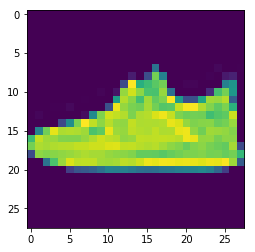

In [20]:
plt.imshow(x_NF[500].reshape(28,28), vmin=0.0, vmax=1.0)
print(measurements.label(x_NF[500])[0])